In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
HTVS = pd.read_csv('../PJDatasets/HTVS_7JXQ_A-noH2O_1cons_xstal_ligands.csv')
HTVS.describe()


,Stars,Entry ID,PDB CRYST1 a,PDB CRYST1 b,PDB CRYST1 c,PDB CRYST1 alpha,PDB CRYST1 beta,PDB CRYST1 gamma,PDB CRYST1 z,PDB format version,...,flags,Energy,tautomer probability,Ionization Penalty,Ionization Penalty Charging,Ionization Penalty Neutral,Charging Adjusted Penalty,XP GScore,XP HBond,XP PoseRank
count,11.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,...,11.0,11.000000,8.000000,11.000000,11.000000,11.000000,11.000000,0.0,0.0,0.0
mean,0.0,776068.500000,59.770917,87.761917,117.064667,81.900000,90.712500,85.491667,7.166667,3.300000e+00,...,0.0,63.800636,0.999375,1.709682,1.317873,0.391809,3.005909,NaN,NaN,NaN
std,0.0,3.605551,5.968968,12.015647,29.734616,10.010213,10.917432,5.571528,1.029857,4.638361e-16,...,0.0,12.979686,0.000518,1.115152,1.270907,0.798246,2.235562,NaN,NaN,NaN
min,0.0,776063.000000,57.113000,74.598000,87.043000,70.560000,78.400000,79.180000,6.000000,3.300000e+00,...,0.0,37.849000,0.999000,0.011500,0.000000,0.009500,0.008000,NaN,NaN,NaN
25%,0.0,776065.750000,57.113000,74.598000,95.569000,70.560000,78.400000,79.180000,6.000000,3.300000e+00,...,0.0,59.150000,0.999000,1.025450,0.002000,0.019750,1.034500,NaN,NaN,NaN
50%,0.0,776068.500000,57.318000,94.741000,95.569000,90.000000,98.690000,90.000000,8.000000,3.300000e+00,...,0.0,61.931000,0.999000,2.193200,2.160200,0.033100,4.328000,NaN,NaN,NaN
75%,0.0,776071.250000,57.318000,94.741000,150.569000,90.000000,98.690000,90.000000,8.000000,3.300000e+00,...,0.0,76.728500,1.000000,2.390700,2.366300,0.070300,4.744000,NaN,NaN,NaN
max,0.0,776074.000000,72.548000,103.224000,150.569000,90.000000,101.550000,90.000000,8.000000,3.300000e+00,...,0.0,78.990000,1.000000,2.768800,2.698500,2.005800,5.395000,NaN,NaN,NaN


In [3]:
# Getting started with the RDKit in Python

#RDKit: Open-source cheminformatics. https://www.rdkit.org
# Reading single molecules from the Chem package
from rdkit import Chem


In [4]:
m = Chem.MolFromSmiles('Cc1ccccc1')
#m = Chem.MolFromMolFile('data/input.mol')
#stringWithMolData=open('data/input.mol','r').read()
#m = Chem.MolFromMolBlock(smiles)


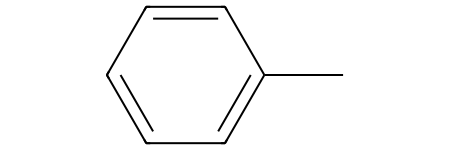

In [5]:
m


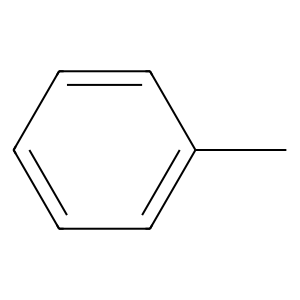

In [6]:
from rdkit.Chem import Draw
img = Draw.MolToImage(m)
img


In [7]:
# Reading sets of molecules
#suppl = Chem.SDMolSupplier("smiles")
#for mol in suppl:
#    if mol is None: continue
#    print(mol.GetNumAtoms())

# OSError: File error: Bad input file smiles


### Lipinski Rule of 5
- Molecular Weight <= 500 Da
- No. Hydrogen Bond Donors <= 10
- No. Hydrogen Bond Acceptors <= 5
- LogP <= 5

Lipinski’s “Rule of 5” 19 was introduced to estimate the oral bioavailability of molecules. Poor absorption is likely if the molecule violates more than one of the following conditions:

In [8]:
# Drawing molecules
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs


In [9]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol


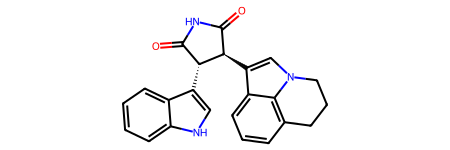

In [10]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol


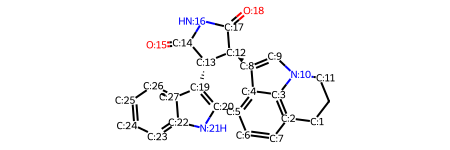

In [11]:
# With atom index
mol_with_atom_index(mol)


## Latest Raw Data

In [12]:
import os
print(os.getcwd())

import pandas as pd
df_7JXQ = pd.read_csv('../PJDatasets/GitHub/Bayesian_Docking-Score_Predictor/SP_7JXQ_A_no-H2O_1cons_M1-div_arm_hb_16rota_new-smiles_dedup_full_columns.csv')




c:\Users\n_oha\OneDrive - University of Virginia\DS6040\DS6040_Repo\PJDatasets


C:\Users\n_oha\AppData\Local\Temp\ipykernel_14472\3668050080.py:5: DtypeWarning: Columns (6,7,8,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,91,92,109,136,137,138,139,140,141,142,143,144,145) have mixed types. Specify dtype option on import or set low_memory=False.
  df_7JXQ = pd.read_csv('../PJDatasets/GitHub/Bayesian_Docking-Score_Predictor/SP_7JXQ_A_no-H2O_1cons_M1-div_arm_hb_16rota_new-smiles_dedup_full_columns.csv')


In [13]:
df_7JXQ.shape   #2121227 x 438


(2121227, 438)

In [14]:
# Drop the first row
df_7JXQ = df_7JXQ.drop([0])


In [15]:
# Drop columns with all 0 values
df_7JXQ = df_7JXQ.loc[:, (df_7JXQ != 0).any(axis=0)]
 

In [16]:
# Drop columns with all NaN values
df_7JXQ = df_7JXQ.dropna(axis=1, how='all')
df_7JXQ.shape   


(2121226, 321)

In [17]:
# Drop columns irrelevant to the model
df_7JXQ = df_7JXQ.drop(columns=['Date Added', 'Date Modified', 'Source File Index', 'Source File', 'Source Path'])
df_7JXQ.shape


(2121226, 316)

In [18]:
df_7JXQ.head()


,Title,Entry ID,Entry Name,SMILES,title backup,mmshare version,label,flags,input,cmdline,...,res:A721 coul,res:A721 hbond,res:A721 dist,res:A721 Eint,res:A704 vdw,res:A704 coul,res:A704 dist,res:A704 Eint,tautomer probability,Chemistry Notes
1,Z94599842,3,M1-diversity.832055,c1cccc(c12)[nH]c(n2)[C@H](Cc3ccccc3)NC(=O)CCCc...,Z94599842,58128.0,13001_sdstereoexpander_1_neutralizer_1_epik_1_...,0.0,W2NIXTFbY0hdW2NIXVtjSF1bY0hdYzFbQ0gyXVtDQEBIXS...,J2VwaWtfcHl0aG9uJywgJy1waCcsICc3LjQwMDAwMCcsIC...,...,-0.094,0.0,7.842,-0.139,-0.080,-0.019,7.087,-0.100,NaN,NaN
2,ORD-MCULE-9289797102,4,M1-diversity.84473,c1sccc1C(=O)Nc(cccc2)c2C(=O)N3CCN(CC3)Cc4csc(n...,ORD-MCULE-9289797102,58128.0,1320_sdstereoexpander_1_neutralizer_1_epik_1_s...,0.0,W2NIXTFzW2NIXVtjSF1jMUMoPU8pW05IXWMyW2NIXVtjSF...,J2VwaWtfcHl0aG9uJywgJy1waCcsICc3LjQwMDAwMCcsIC...,...,-0.060,0.0,7.895,-0.109,-0.098,-0.035,6.633,-0.133,NaN,NaN
3,Z1013750852,5,M1-diversity.1011658,Cc1cc(C)cc(c1)Nc2ccn(c(n2)=O)-c(c3-c4ccccc4)nc...,Z1013750852,58128.0,15808_sdstereoexpander_1_neutralizer_1_epik_1_...,0.0,W0NIM11jMVtjSF1jKFtDSDNdKVtjSF1jKFtjSF0xKVtOSF...,J2VwaWtfcHl0aG9uJywgJy1waCcsICc3LjQwMDAwMCcsIC...,...,-0.282,0.0,7.977,-0.320,-0.117,0.049,6.097,-0.068,1.0,NaN
4,ORD-MCULE-8178539713,6,M1-diversity.383224,O=C1CCCN1c(c(Cl)cc2)cc2C(=O)NN(C(=O)N3)C(=O)C3...,ORD-MCULE-8178539713,58128.0,5988_sdstereoexpander_1_neutralizer_1_epik_1_s...,0.0,W2NIXTFbY0hdW2NIXVtjSF1bY0hdYzFDMihjM1tjSF1bY0...,J2VwaWtfcHl0aG9uJywgJy1waCcsICc3LjQwMDAwMCcsIC...,...,-0.128,0.0,8.164,-0.169,-0.116,-0.001,6.552,-0.117,NaN,NaN
5,Z425189676,7,M1-diversity.968774,c1cccc(c12)c(=O)n(-c3ccccc3)nc2C(=O)N(CC4)CC=C...,Z425189676,58128.0,15138_sdstereoexpander_1_neutralizer_1_epik_1_...,0.0,W2NIXTFbY0hdW2NIXVtjSF1bY0hdYzEtbihjMj1PKW5jKG...,J2VwaWtfcHl0aG9uJywgJy1waCcsICc3LjQwMDAwMCcsIC...,...,-0.160,0.0,8.002,-0.203,-0.109,0.015,7.069,-0.094,1.0,NaN


In [19]:
features = list(df_7JXQ.columns.T)
features



['Title',
 'Entry ID',
 'Entry Name',
 'SMILES',
 'title backup',
 'mmshare version',
 'label',
 'flags',
 'input',
 'cmdline',
 'Ionization Penalty',
 'Ionization Penalty Charging',
 'Ionization Penalty Neutral',
 'State Penalty',
 'Charging Adjusted Penalty',
 'Tot Q',
 'Tot abs Q',
 'Force Field',
 'Energy',
 'Chiralities Consistent',
 'Variant',
 'variant',
 'glide gridfile',
 'glide lignum',
 'glide rotatable bonds',
 'docking score',
 'glide ligand efficiency',
 'glide ligand efficiency sa',
 'glide ligand efficiency ln',
 'glide gscore',
 'glide lipo',
 'glide hbond',
 'glide metal',
 'glide rewards',
 'glide evdw',
 'glide ecoul',
 'glide erotb',
 'glide esite',
 'glide emodel',
 'glide energy',
 'glide einternal',
 'glide emodel strain',
 'glide gscore strain',
 'glide confnum',
 'glide posenum',
 'glide eff state penalty',
 'conssat A:GLU:758:OE2(hbond)',
 'conssat A:ASP:855:OD1(hbond)',
 'conssat A:PHE:856:O(hbond)',
 'conssat A:THR:854:OG1(hbond)',
 'conssat A:THR:854:HG1(h

In [20]:
# Find the rows in the dataframe where the 'SMILES' is unique
df_7JXQ['SMILES'].nunique()   # 2121226


2121226

In [21]:
# SMILES 
SMILES = df_7JXQ.loc[1:, ['SMILES']]
SMILES.head()


,SMILES
1,c1cccc(c12)[nH]c(n2)[C@H](Cc3ccccc3)NC(=O)CCCc...
2,c1sccc1C(=O)Nc(cccc2)c2C(=O)N3CCN(CC3)Cc4csc(n...
3,Cc1cc(C)cc(c1)Nc2ccn(c(n2)=O)-c(c3-c4ccccc4)nc...
4,O=C1CCCN1c(c(Cl)cc2)cc2C(=O)NN(C(=O)N3)C(=O)C3...
5,c1cccc(c12)c(=O)n(-c3ccccc3)nc2C(=O)N(CC4)CC=C...


In [22]:
# find the top 10 docking scores
dock_score = df_7JXQ.loc[1:, ['docking score']]
print(dock_score.nsmallest(10, "docking score"))  


    docking score
1         -12.086
2         -11.969
3         -11.944
4         -11.897
5         -11.863
6         -11.754
7         -11.667
8         -11.642
9         -11.530
10        -11.514


In [23]:
dock_score.describe()


,docking score
count,2.121226e+06
mean,-5.824917e+00
std,1.477413e+00
min,-1.208600e+01
25%,-6.818000e+00
50%,-5.969000e+00
75%,-4.979000e+00
max,1.297800e+01


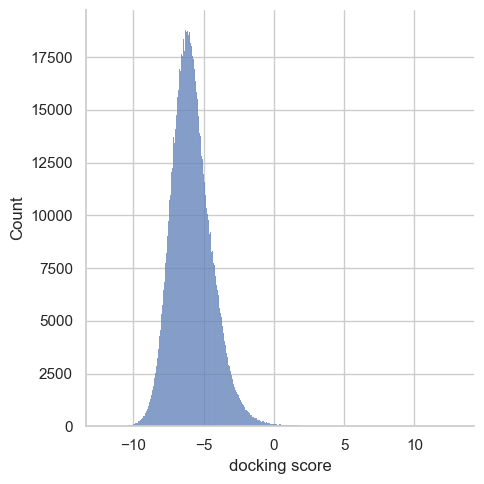

In [24]:
# Docking score distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Find the top 10 docking scores
#dock_score = df_7JXQ.loc[1:, ['docking score']]

# Plot the distribution
sns.set_theme(style="whitegrid")
dist = dock_score['docking score']
axs = sns.displot(dist)
plt.show()

